In [73]:
import pandas_datareader.data as web
import datetime

start = '2016-01-01'
end = datetime.date.today()
name = '^NDQ'
#銘柄code
symbols=name

df = web.DataReader(name, 'stooq', start, end)
df.sort_values(['Date'], inplace=True)

In [59]:
df['ma25'] = df['Close'].rolling(window=25).mean()

In [60]:
import talib as ta
df['ma200'] = ta.SMA(df['Close'], timeperiod=200)

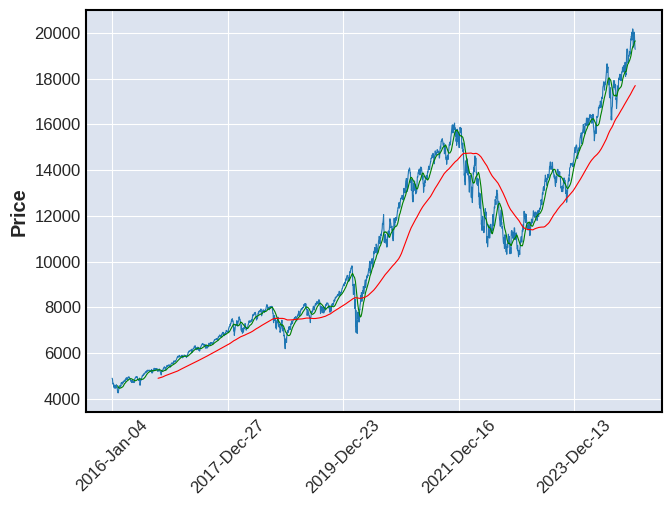

In [64]:
import mplfinance as mpf

# 移動平均線の計算
df['ma25'] = df['Close'].rolling(window=25).mean()
df['ma200'] = df['Close'].rolling(window=200).mean()

# 表示したいデータをリスト形式で指定
apd = [
    mpf.make_addplot(df['ma25'], color='green', width=0.8),
    mpf.make_addplot(df['ma200'], color='red', width=0.8),
]
mpf.plot(df, type='line', addplot=apd)

In [77]:
#csvの日付を文字列データや数値データを日付データであるdatetime64型に変換
#変換をしてから、日足から週足・月足を作ったり、チャート作成の期間指定で利用しています。
#stock_datetime = df['Date']
mpf.plot(
    df,
    title=name+'_日足チャート',
    type='candle',
    mav=(25, 50, 75),
    datetime_format='%Y/%m/%d',
    tight_layout=False,
    volume=True,
    figratio=(19,9),
    style='stooq',
    savefig=str(symbols)+'_daily.png')

TypeError: kwarg "style" validator returned False for value: "stooq"
    def _valid_mpf_style(value):
    if value in available_styles():
        return True
    if not isinstance(value,dict):
        return False
    if 'marketcolors' not in value:
        return False
    if not isinstance(value['marketcolors'],dict):
        return False
    # {'candle': {'up': 'b', 'down': 'g'},
    #  'edge': {'up': 'k', 'down': 'k'},
    #  'wick': {'up': 'k', 'down': 'k'},
    #  'ohlc': {'up': 'k', 'down': 'k'},
    #  'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
    #  'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
    #  'vcdopcod': False,
    #  'alpha': 0.9}
    for item in ('candle','edge','wick','ohlc','volume'):
        if item not in value['marketcolors']:
            return False
        itemcolors = value['marketcolors'][item]
        if not isinstance(itemcolors,dict):
            return False
        if 'up' not in itemcolors or 'down' not in itemcolors:
            return False
    return True